# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2
- matplotlib 3.5.2


In [1]:
import numpy as np, sklearn, matplotlib

from matplotlib import pyplot as plt
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
from PIL import Image, ImageStat

In [2]:
I = Image.open('lena.jpg')
I=I.convert('L') # 'L' for gray scale mode
stat = ImageStat.Stat(I)
I = np.asarray(I)

In [3]:
graph = image.img_to_graph(I)

In [4]:
graph.data = np.exp(-3*graph.data / stat.stddev)

In [5]:
labels = spectral_clustering(graph, n_clusters = 10, assign_labels='discretize', eigen_solver='amg')

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:340: UserWarning: Exited at iteration 20 with accuracies 
[8.40908071e-15 2.92433068e-05 4.96774940e-05 4.54135810e-05
 5.22635520e-05 6.01684753e-05 8.44689378e-05 1.00115577e-04
 9.56720640e-05 2.34563424e-04 2.62819134e-04]
not reaching the requested tolerance 1e-05.
  _, diffusion_map = lobpcg(laplacian, X, M=M, tol=1.0e-5, largest=False)


Ver documentación en: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

In [6]:
labels = labels.reshape(I.shape)

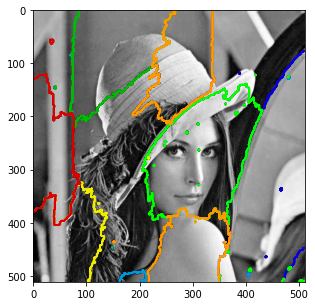

In [7]:
from matplotlib import cm, colors

classes = np.unique(labels)
plt.figure(figsize=(5,5))
plt.imshow(I, cmap='gray')
for l in classes:
    plt.contour(labels == l, colors=[cm.nipy_spectral(l / float(len(classes))),])
    
plt.show()